#Аудиториска вежба 5: Introduction to Machine Learning

### <font color='green'>Machine Learning Steps<font>

1. Data preparation


> Read the dataset


> If there is no train and test data, split the data with 80:20 ratio (or another ratio)


> If the inputs and outputs are not merged, find the key, then join the tables into one

2. Obtaining the dataset

Find out how many outputs are in the dataset and decide on the best model:


> Classification (Binary, Multi-label, Multi-class)


> Regression (Linear, Logistic, Polynomial, Bayesian Linear...)



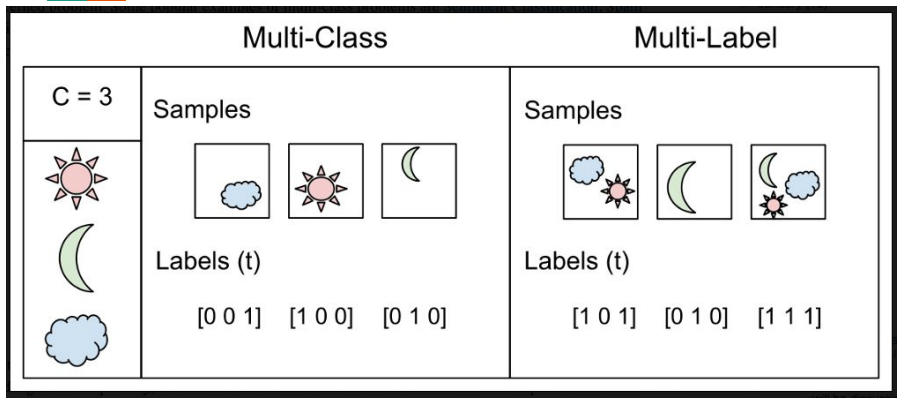

### <font color='orange'>Regression models<font>

#### <font color='white'>Linear Regression<font>

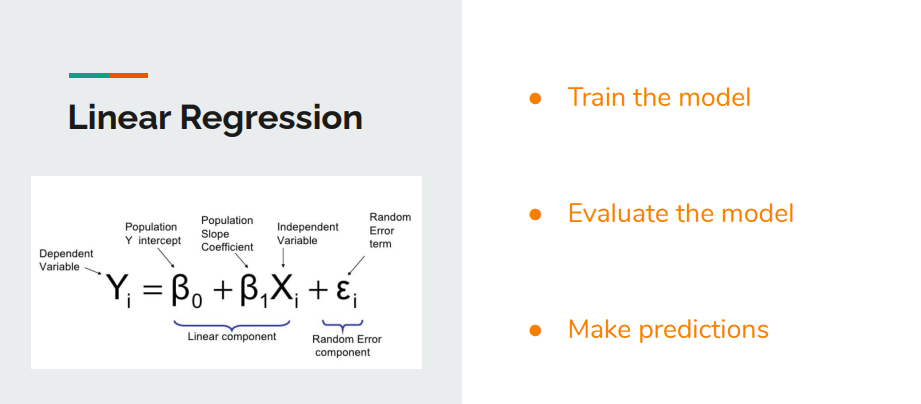

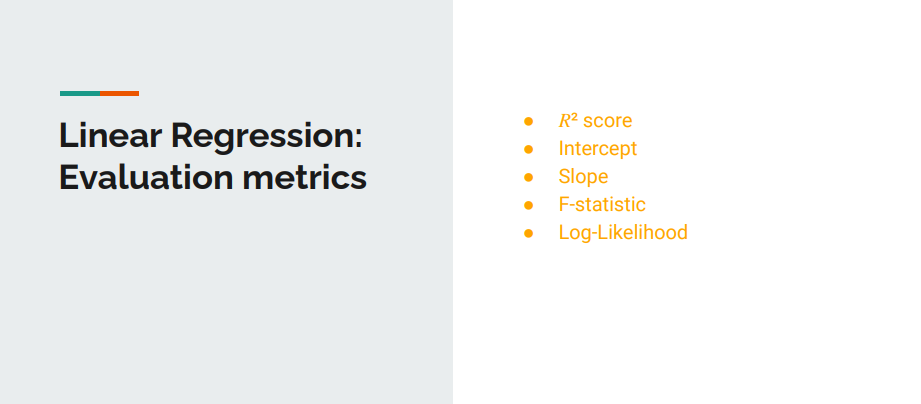

A linear regression line has an equation of the form Y = a + bX, where X is the explanatory variable and Y is the dependent variable. The slope of the line is b, and a is the intercept (the value of y when x = 0).



In [ ]:
import pandas as pd

In [ ]:
#Resource: https://www.kaggle.com/datasets/ashydv/advertising-dataset
data = pd.read_csv('/content/drive/MyDrive/ВНП 22 23 - Вежби/Аудиториски вежби/05/datasets/advertising.csv') 

In [ ]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

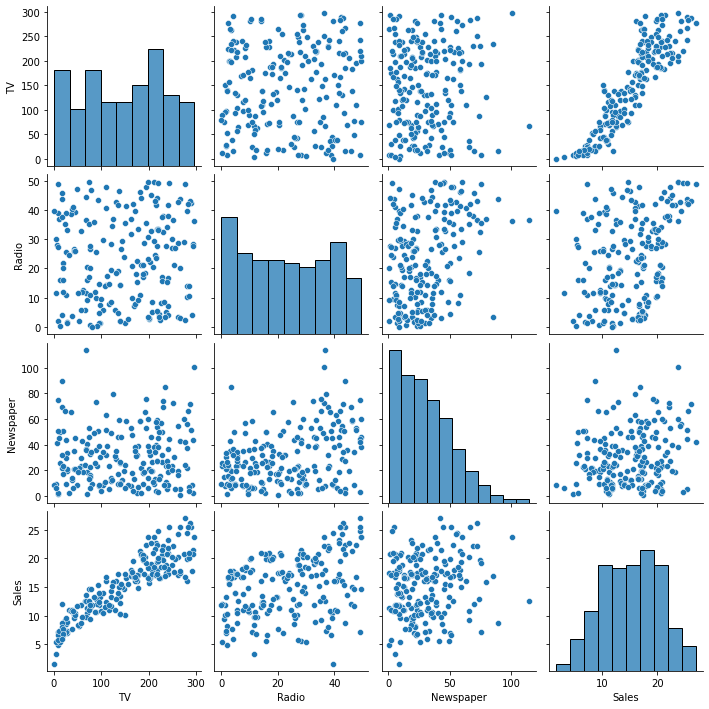

In [ ]:
#Note: We use a pairplot to visualize which features are related with each outher.
#Resource: https://medium.com/analytics-vidhya/pairplot-visualization-16325cd725e6
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(data)

In [ ]:
#Note: The train_test_split model takes three arguments: the train part of the data, the test part of the data, and the size of the test part that we want.
#Note: It's important that the % of the data in the test dataset is chosen randomly and not consecutively.
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(data[data.columns[:-1]],  data['Sales'], test_size=0.2)

**Scaling the values**

In [ ]:
#Note: Standardize features by removing the mean and scaling to unit variance, move the data towards a Normal Distribution.
#Note: In some cases, we may not need to normalize.
from sklearn.preprocessing import StandardScaler

#Note: We fit on the train data, to avoid falling into local values.
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

**Training the model**

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train, Y_train)

**Evaluating the model**

In [ ]:
#Note: R² is a statistical measure in a regression model that determines the proportion of variance in the dependent variable that can be explained by the independent variable.
#Note: In other words, it shows how well the data fit the regression model (the goodness of fit).
r_sq = model.score(X_train, Y_train)
print('Coefficient of determination:', r_sq)

Coefficient of determination: 0.9113324507932911


In [ ]:
model.coef_

array([4.90978078, 1.63014234, 0.03010039])

In [ ]:
#Note: Intercept in a regression model is the expected mean value of Y when all X=0. 
print('Intercept:', model.intercept_)

Intercept: 15.19375


Therefore, the function is: 4.71696572 * X + 1.57610256 * Y + (-0.04844321) * Z + 15.308745, where X <=> TV, Y <=> Radio, Z <=> Newspaper

Sales[i] = 4.53263124 * TV[i] + 1.68755478 * Radio[i] + (-0.01107218) * Newspaper[i] + 15.2475

In [ ]:
Y_pred_lin = model.predict(X_test)
Y_pred_lin

array([ 9.86217639, 15.01004695, 15.76421213, 12.13127613, 14.43909796,
       20.57815952, 10.04720373, 18.07205256, 11.53131065, 15.50815966,
       12.28239285,  9.33843205, 13.63878702, 17.22994775, 18.1431708 ,
       10.39861666, 10.42588901, 24.86431187, 17.41258494, 24.05021384,
       19.94708397, 16.40298968, 13.26594554, 14.18042157,  8.60524762,
       17.02991391, 21.28970037, 10.75397609,  8.71646214, 19.38001886,
        5.97591986,  5.04510115, 21.41375241, 10.76331216, 10.22515987,
        9.60767834, 18.0763121 , 15.15503471, 20.76751612, 20.22386421])

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(Y_test, Y_pred_lin)

0.8430882232936787

**Another way to perform a Linear Regression**

In [ ]:
#Resource: https://towardsdatascience.com/understanding-the-ols-method-for-simple-linear-regression-e0a4e8f692cc
#Resource: https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html
import numpy as np
import statsmodels.api as sm

In [ ]:
x = sm.add_constant(X_train)
model = sm.OLS(Y_train, x)

In [ ]:
results = model.fit()

F-statistics is a statistic used to test the significance of regression coefficients in linear regression models.

The log-likelihood value of a regression model is a way to measure the goodness of fit for a model. The higher the value of the log-likelihood, the better a model fits a dataset.

In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     534.5
Date:                Tue, 15 Nov 2022   Prob (F-statistic):           8.06e-82
Time:                        17:42:42   Log-Likelihood:                -304.75
No. Observations:                 160   AIC:                             617.5
Df Residuals:                     156   BIC:                             629.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.1937      0.130    116.754      0.000      14.937      15.451
x1             4.9098      0.131     37.487      0.000       4.651       5.168
x2             1.6301      0.137     11.922      0.000       1.360       1.900
x3             0.0301      0.138      0.219      0.827      -0.242       0.302
==============================================================================
Omnibus:                       20.241   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.646
Skew:                          -0.621   Prob(JB):                     1.82e-08
Kurtosis:                       4.951   Cond. No.                         1.40
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
x = sm.add_constant(X_test)

Y_pred_sm = results.predict(x)
print(Y_pred_sm)

[ 9.86217639 15.01004695 15.76421213 12.13127613 14.43909796 20.57815952
 10.04720373 18.07205256 11.53131065 15.50815966 12.28239285  9.33843205
 13.63878702 17.22994775 18.1431708  10.39861666 10.42588901 24.86431187
 17.41258494 24.05021384 19.94708397 16.40298968 13.26594554 14.18042157
  8.60524762 17.02991391 21.28970037 10.75397609  8.71646214 19.38001886
  5.97591986  5.04510115 21.41375241 10.76331216 10.22515987  9.60767834
 18.0763121  15.15503471 20.76751612 20.22386421]


In [ ]:
first = Y_pred_lin.tolist()
first

[9.862176394834485,
 15.010046947150418,
 15.764212132862161,
 12.131276133328564,
 14.43909796499081,
 20.578159517882668,
 10.047203726680848,
 18.072052562100456,
 11.531310648114642,
 15.508159664142463,
 12.282392853447641,
 9.338432049220387,
 13.638787024916441,
 17.229947751246478,
 18.143170801397414,
 10.398616662340448,
 10.42588900925698,
 24.864311873818394,
 17.41258493938426,
 24.05021383645614,
 19.947083970882712,
 16.40298967862149,
 13.265945536645589,
 14.180421565960755,
 8.605247618992028,
 17.02991391152639,
 21.289700367993532,
 10.753976086325618,
 8.716462143496024,
 19.380018860640266,
 5.975919857685216,
 5.045101149053274,
 21.413752411299907,
 10.76331215688459,
 10.225159866234948,
 9.607678342319716,
 18.07631209766264,
 15.155034713317585,
 20.76751612087321,
 20.223864210337172]

In [ ]:
second = Y_pred_sm.tolist()
second

[9.862176394834483,
 15.010046947150412,
 15.764212132862156,
 12.13127613332856,
 14.439097964990806,
 20.57815951788266,
 10.047203726680843,
 18.072052562100453,
 11.531310648114637,
 15.508159664142458,
 12.282392853447636,
 9.338432049220385,
 13.638787024916438,
 17.22994775124647,
 18.143170801397407,
 10.398616662340444,
 10.425889009256977,
 24.864311873818387,
 17.412584939384253,
 24.05021383645613,
 19.94708397088271,
 16.402989678621484,
 13.265945536645585,
 14.180421565960748,
 8.605247618992026,
 17.029913911526386,
 21.28970036799352,
 10.753976086325615,
 8.716462143496022,
 19.38001886064026,
 5.9759198576852155,
 5.045101149053273,
 21.413752411299896,
 10.763312156884588,
 10.225159866234947,
 9.607678342319716,
 18.076312097662637,
 15.15503471331758,
 20.767516120873204,
 20.223864210337165]

In [ ]:
both = zip(first, second)
for i in both:
  print(str(i[0]) + ', ' + str(i[1]) + ', ' + str(round(i[0]) - round(i[1]) < 0.01))

9.862176394834485, 9.862176394834483, True
15.010046947150418, 15.010046947150412, True
15.764212132862161, 15.764212132862156, True
12.131276133328564, 12.13127613332856, True
14.43909796499081, 14.439097964990806, True
20.578159517882668, 20.57815951788266, True
10.047203726680848, 10.047203726680843, True
18.072052562100456, 18.072052562100453, True
11.531310648114642, 11.531310648114637, True
15.508159664142463, 15.508159664142458, True
12.282392853447641, 12.282392853447636, True
9.338432049220387, 9.338432049220385, True
13.638787024916441, 13.638787024916438, True
17.229947751246478, 17.22994775124647, True
18.143170801397414, 18.143170801397407, True
10.398616662340448, 10.398616662340444, True
10.42588900925698, 10.425889009256977, True
24.864311873818394, 24.864311873818387, True
17.41258493938426, 17.412584939384253, True
24.05021383645614, 24.05021383645613, True
19.947083970882712, 19.94708397088271, True
16.40298967862149, 16.402989678621484, True
13.265945536645589, 13.2

In [ ]:
for i in range(0, len(first)):
   print(str(first[i]) + ', ' + str(second[i]) + ', ' + str(round(first[i]) - round(second[i]) < 0.01))  

9.862176394834485, 9.862176394834483, True
15.010046947150418, 15.010046947150412, True
15.764212132862161, 15.764212132862156, True
12.131276133328564, 12.13127613332856, True
14.43909796499081, 14.439097964990806, True
20.578159517882668, 20.57815951788266, True
10.047203726680848, 10.047203726680843, True
18.072052562100456, 18.072052562100453, True
11.531310648114642, 11.531310648114637, True
15.508159664142463, 15.508159664142458, True
12.282392853447641, 12.282392853447636, True
9.338432049220387, 9.338432049220385, True
13.638787024916441, 13.638787024916438, True
17.229947751246478, 17.22994775124647, True
18.143170801397414, 18.143170801397407, True
10.398616662340448, 10.398616662340444, True
10.42588900925698, 10.425889009256977, True
24.864311873818394, 24.864311873818387, True
17.41258493938426, 17.412584939384253, True
24.05021383645614, 24.05021383645613, True
19.947083970882712, 19.94708397088271, True
16.40298967862149, 16.402989678621484, True
13.265945536645589, 13.2

### <font color='pink'>Classification models<font>

**Accuracy** 
> Accuracy is the most intuitive performance measure and it is simply a ratio of correctly predicted observation to the total observations. One may think that, if we have high accuracy then our model is best. Yes, accuracy is a great measure but only when you have symmetric datasets where values of false positive and false negatives are almost same. Therefore, you have to look at other parameters to evaluate the performance of your model. For our model, we have got 0.803 which means our model is approx. 80% accurate.

> Accuracy = TP+TN/TP+FP+FN+TN

**Precision** 
> Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. The question that this metric answer is of all passengers that labeled as survived, how many actually survived? High precision relates to the low false positive rate. We have got 0.788 precision which is pretty good.

> Precision = TP/TP+FP

**Recall (Sensitivity)**
> Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes. The question recall answers is: Of all the passengers that truly survived, how many did we label? We have got recall of 0.631 which is good for this model as it’s above 0.5.

> Recall = TP/TP+FN

**F1 score**
> F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall. In our case, F1 score is 0.701.

> F1 Score = 2*(Recall * Precision) / (Recall + Precision)

**Support**
> Support is the number of actual occurrences of the class in the dataset. It doesn’t vary between models, it just diagnoses the performance evaluation process.

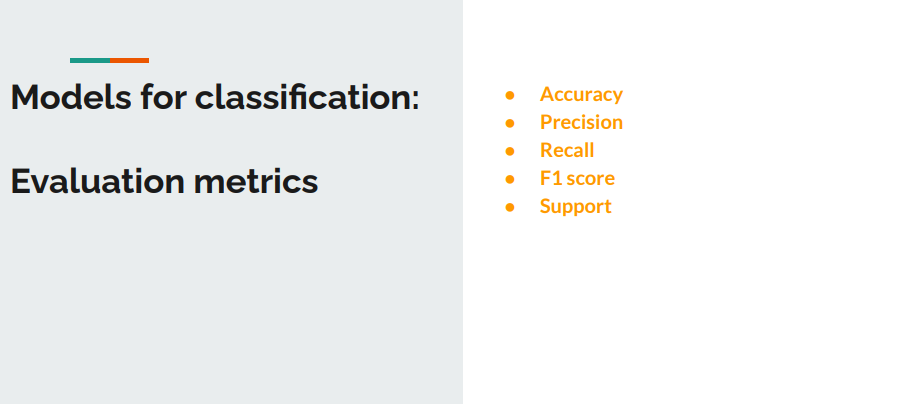

#### <font color='white'>KNN Classification<font>

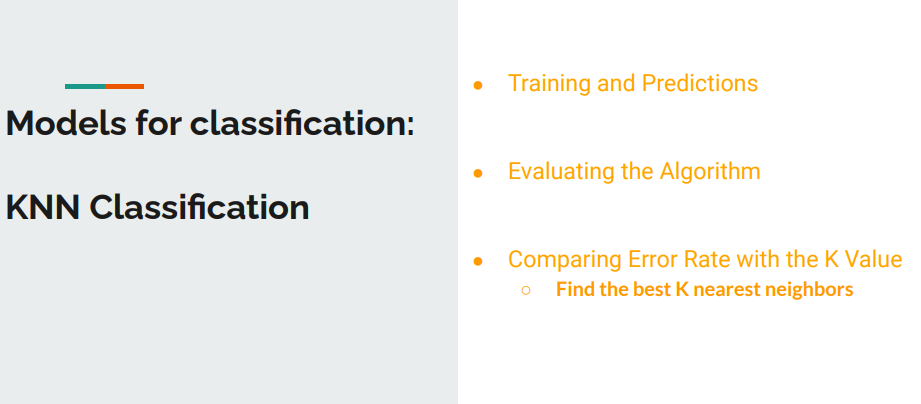

In [ ]:
#Resource: https://www.kaggle.com/datasets/itsmesunil/bank-loan-modelling
data = pd.read_csv('/content/drive/MyDrive/ВНП 22 23 - Вежби/Аудиториски вежби/05/datasets/Bank_Personal_Loan_Modelling.xlsx - Data.csv') 

In [ ]:
data.head() 

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


Target column in this case is Personal Loan (0/1), depicting whether the person will be granted a loan or not.

In [ ]:
data['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

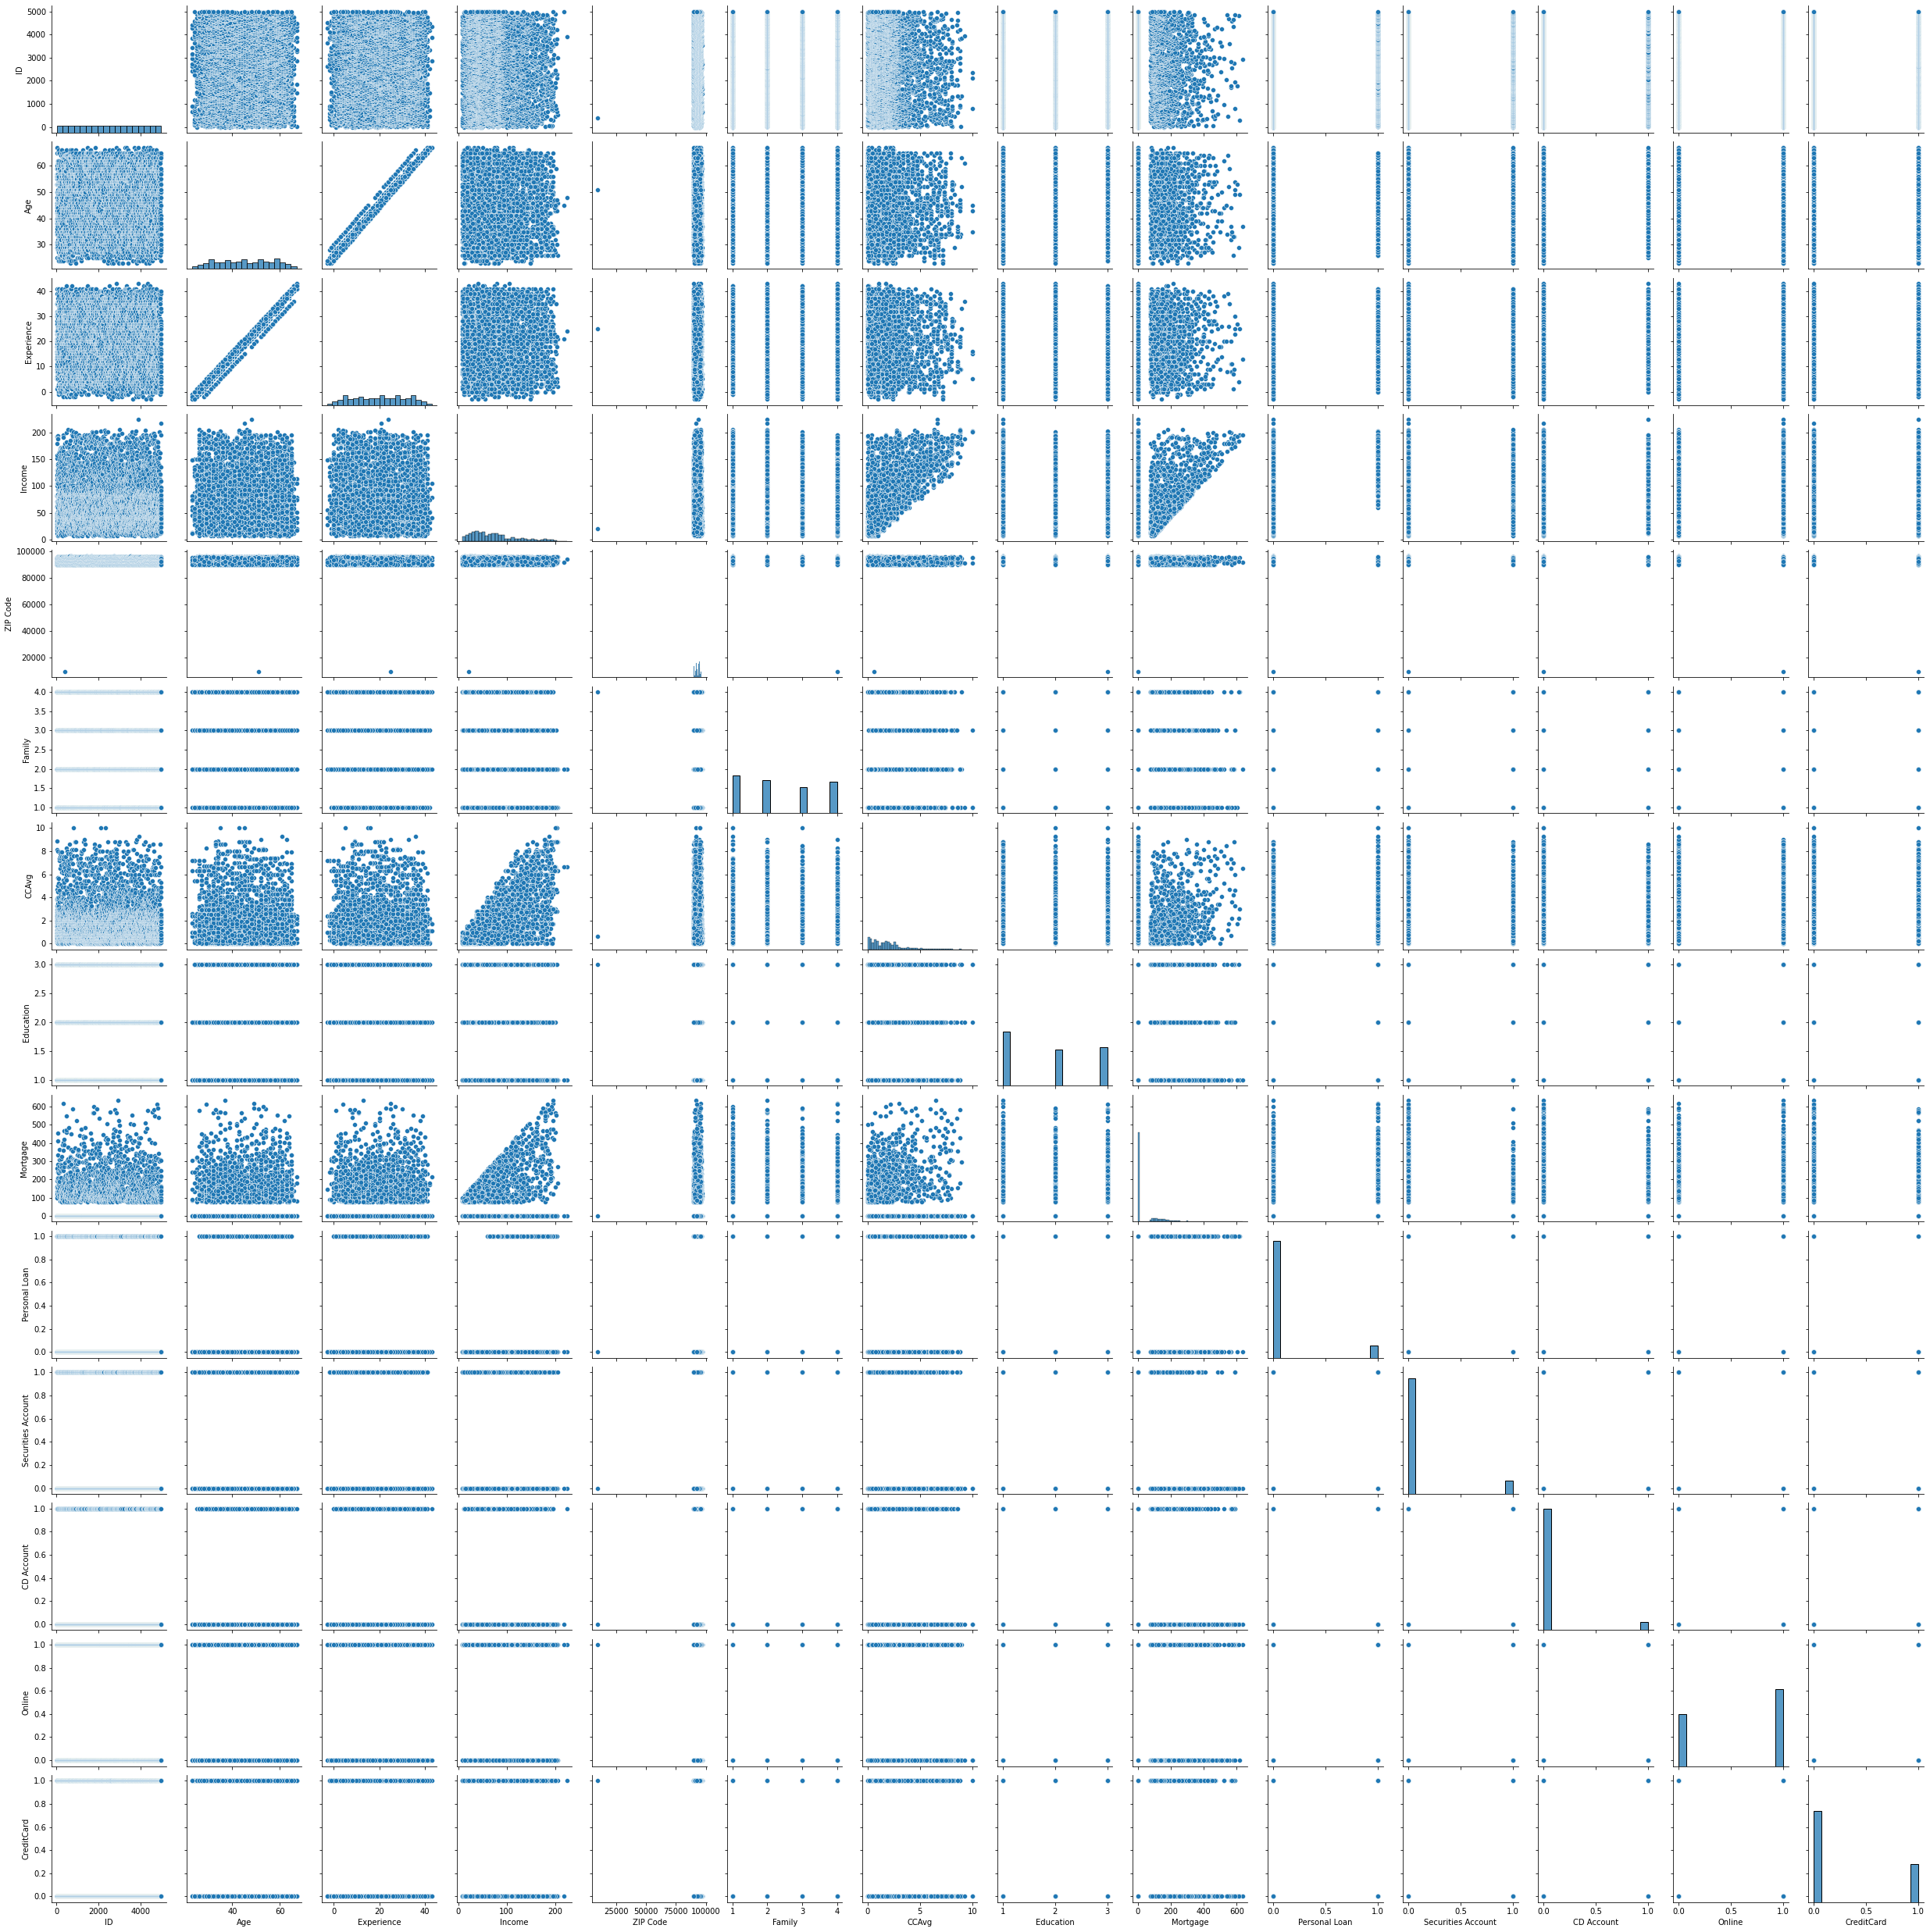

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(data)

In [ ]:
t = data.copy()
t.drop('Personal Loan', axis=1, inplace=True)

In [ ]:
#Note: It's important not to use columns like ID! Why?
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(t[t.columns[1:]],  data['Personal Loan'], test_size=0.2)

In [ ]:
X_train.shape 

(4000, 12)

In [ ]:
Y_train.shape 

(4000,)

**Scaling the values**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 

**Training the model**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, Y_train)

KNeighborsClassifier()

In [ ]:
Y_pred = classifier.predict(X_test) 

**Confusion Matrix** 

**TP** - You predicted positive and it’s true.

**TN** - You predicted negative and it’s true.

**FP** (Type 1 Error) - You predicted positive and it’s false.

**FN** (Type 2 Error) - You predicted negative and it’s false.

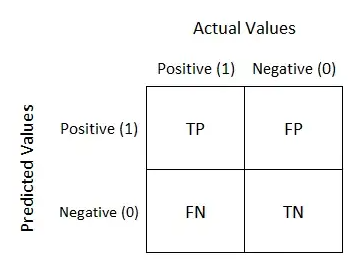

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score

print(confusion_matrix(Y_test, Y_pred))

[[901   3]
 [ 43  53]]


In [ ]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       904
           1       0.95      0.55      0.70        96

    accuracy                           0.95      1000
   macro avg       0.95      0.77      0.84      1000
weighted avg       0.95      0.95      0.95      1000



In [ ]:
print(f1_score(Y_test, Y_pred))

0.6973684210526316


We can see that the F1 score in this case is low, especially when predicting the class 1. We then suspect that this is a result of a bad distribution of the dataset, i.e. that there are many more 0s than 1s.

We check this claim with the following code and conclude that our assumption is correct.

In [ ]:
data['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

We know that there are 480 ones in the data, so we shrink the data to have an equal number of 1s and 0s - i.e. 480.

In [ ]:
even_df = pd.concat([data[data['Personal Loan'] == 0][:480], data[data['Personal Loan'] == 1]], axis=0)

In [ ]:
even_df['Personal Loan'].value_counts()

0    480
1    480
Name: Personal Loan, dtype: int64

In [ ]:
even_df.shape

(960, 14)

In [ ]:
t = even_df.copy()
t.drop('Personal Loan', axis=1, inplace=True)

X_train, X_test, Y_train, Y_test = train_test_split(t[t.columns[1:]],  even_df['Personal Loan'], test_size=0.2)

**Scaling the values**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 

**Training the model**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, Y_train)

KNeighborsClassifier()

In [ ]:
Y_pred = classifier.predict(X_test) 

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score

print(confusion_matrix(Y_test, Y_pred))

[[92  4]
 [10 86]]


In [ ]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        96
           1       0.96      0.90      0.92        96

    accuracy                           0.93       192
   macro avg       0.93      0.93      0.93       192
weighted avg       0.93      0.93      0.93       192



We can see that the results are so much better when the data that is fed to the model is more representative.

In [ ]:
print(f1_score(Y_test, Y_pred))

0.924731182795699


#### <font color='white'>Logistic Regression<font>

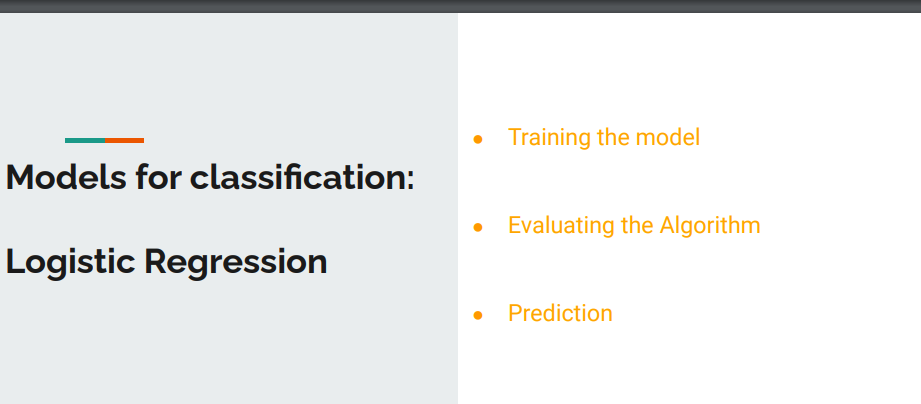

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter= 15000)
model.fit(X_train, Y_train)

LogisticRegression(max_iter=15000)

In [ ]:
Y_pred = model.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(X_test, Y_test)))

Accuracy of logistic regression classifier on test set: 0.90


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[86 10]
 [ 9 87]]
              precision    recall  f1-score   support

           0       0.91      0.90      0.90        96
           1       0.90      0.91      0.90        96

    accuracy                           0.90       192
   macro avg       0.90      0.90      0.90       192
weighted avg       0.90      0.90      0.90       192



In [ ]:
print(f1_score(Y_test, Y_pred))

0.9015544041450777
